In [1]:
import scanpy as sc
import pandas as pd

In [2]:
SID = '242'

In [3]:
adata = sc.read_h5ad(f"/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/{SID}/adata_{SID}_raw.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 474471 × 18936
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [5]:
adata.var.head()

""
A1BG
A1CF
A2M
A2ML1
A3GALT2


In [6]:
adata.obs.head()

,fov,Area,AspectRatio,CenterX_local_px,CenterY_local_px,Width,Height,Mean.PanCK,Max.PanCK,Mean.CD68_CK8_18,...,CenterX_local_mm,CenterY_local_mm,CenterX_global_mm,CenterY_global_mm,run,rep,sec,did,sid,pid
c_4_34_1,34,9274,1.45,92,44,129,89,31,2800,20,...,0.011066,0.005292,0.459109,5.036845,2,4,2,24,242,23H42952_A19
c_4_34_2,34,4420,1.32,264,35,94,71,59,1004,43,...,0.031754,0.004210,0.479797,5.037928,2,4,2,24,242,23H42952_A19
c_4_34_3,34,10253,1.24,332,57,143,115,37,1660,46,...,0.039933,0.006856,0.487976,5.035282,2,4,2,24,242,23H42952_A19
c_4_34_4,34,5918,1.08,482,50,109,101,72,1416,149,...,0.057975,0.006014,0.506018,5.036124,2,4,2,24,242,23H42952_A19
c_4_34_5,34,5166,1.47,549,34,103,70,121,1724,76,...,0.066034,0.004090,0.514077,5.038048,2,4,2,24,242,23H42952_A19


In [7]:
metadata = pd.read_csv(f"/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/{SID}/cluster_metadata.csv", index_col=0)
metadata.head()

,"lv1[[""clust""]]"
c_4_34_1,str
c_4_34_2,str
c_4_34_3,imm
c_4_34_4,str
c_4_34_5,imm


In [8]:
shared_index = metadata.index.intersection(adata.obs_names)
shared_index

Index(['c_4_34_1', 'c_4_34_2', 'c_4_34_3', 'c_4_34_4', 'c_4_34_5', 'c_4_34_7',
       'c_4_34_8', 'c_4_34_10', 'c_4_34_13', 'c_4_34_14',
       ...
       'c_4_221_1846', 'c_4_221_1847', 'c_4_221_1848', 'c_4_221_1849',
       'c_4_221_1850', 'c_4_221_1852', 'c_4_221_1854', 'c_4_221_1855',
       'c_4_221_1856', 'c_4_221_1857'],
      dtype='object', length=451314)

In [9]:
adata_filtered = adata[shared_index].copy()  # Subset adata for shared cells

In [10]:
adata_filtered.obs.head()

,fov,Area,AspectRatio,CenterX_local_px,CenterY_local_px,Width,Height,Mean.PanCK,Max.PanCK,Mean.CD68_CK8_18,...,CenterX_local_mm,CenterY_local_mm,CenterX_global_mm,CenterY_global_mm,run,rep,sec,did,sid,pid
c_4_34_1,34,9274,1.45,92,44,129,89,31,2800,20,...,0.011066,0.005292,0.459109,5.036845,2,4,2,24,242,23H42952_A19
c_4_34_2,34,4420,1.32,264,35,94,71,59,1004,43,...,0.031754,0.004210,0.479797,5.037928,2,4,2,24,242,23H42952_A19
c_4_34_3,34,10253,1.24,332,57,143,115,37,1660,46,...,0.039933,0.006856,0.487976,5.035282,2,4,2,24,242,23H42952_A19
c_4_34_4,34,5918,1.08,482,50,109,101,72,1416,149,...,0.057975,0.006014,0.506018,5.036124,2,4,2,24,242,23H42952_A19
c_4_34_5,34,5166,1.47,549,34,103,70,121,1724,76,...,0.066034,0.004090,0.514077,5.038048,2,4,2,24,242,23H42952_A19


In [11]:
for column in metadata.columns:
    column_name = "add_sub"
    adata_filtered.obs[column_name] = metadata[column].values

In [12]:
adata_filtered.obs.head()

,fov,Area,AspectRatio,CenterX_local_px,CenterY_local_px,Width,Height,Mean.PanCK,Max.PanCK,Mean.CD68_CK8_18,...,CenterY_local_mm,CenterX_global_mm,CenterY_global_mm,run,rep,sec,did,sid,pid,add_sub
c_4_34_1,34,9274,1.45,92,44,129,89,31,2800,20,...,0.005292,0.459109,5.036845,2,4,2,24,242,23H42952_A19,str
c_4_34_2,34,4420,1.32,264,35,94,71,59,1004,43,...,0.004210,0.479797,5.037928,2,4,2,24,242,23H42952_A19,str
c_4_34_3,34,10253,1.24,332,57,143,115,37,1660,46,...,0.006856,0.487976,5.035282,2,4,2,24,242,23H42952_A19,imm
c_4_34_4,34,5918,1.08,482,50,109,101,72,1416,149,...,0.006014,0.506018,5.036124,2,4,2,24,242,23H42952_A19,str
c_4_34_5,34,5166,1.47,549,34,103,70,121,1724,76,...,0.004090,0.514077,5.038048,2,4,2,24,242,23H42952_A19,imm


In [13]:
set(adata_filtered.obs.add_sub.unique())

{'epi', 'imm', 'str'}

In [14]:
print(adata.X)

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 409271479 stored elements and shape (474471, 18936)>
  Coords	Values
  (203, 0)	1.0
  (310, 0)	1.0
  (386, 0)	3.0
  (615, 0)	1.0
  (654, 0)	1.0
  (682, 0)	2.0
  (782, 0)	1.0
  (868, 0)	1.0
  (885, 0)	1.0
  (893, 0)	1.0
  (926, 0)	2.0
  (979, 0)	2.0
  (994, 0)	1.0
  (1018, 0)	1.0
  (1022, 0)	2.0
  (1116, 0)	1.0
  (1144, 0)	1.0
  (1205, 0)	1.0
  (1223, 0)	1.0
  (1305, 0)	1.0
  (1348, 0)	1.0
  (1536, 0)	1.0
  (1587, 0)	1.0
  (1617, 0)	1.0
  (1651, 0)	2.0
  :	:
  (473111, 18935)	1.0
  (473125, 18935)	2.0
  (473178, 18935)	1.0
  (473220, 18935)	1.0
  (473256, 18935)	1.0
  (473263, 18935)	2.0
  (473366, 18935)	1.0
  (473417, 18935)	1.0
  (473507, 18935)	1.0
  (473547, 18935)	1.0
  (473576, 18935)	1.0
  (473632, 18935)	2.0
  (473644, 18935)	1.0
  (473667, 18935)	1.0
  (473711, 18935)	2.0
  (473756, 18935)	1.0
  (473790, 18935)	1.0
  (473880, 18935)	1.0
  (473897, 18935)	1.0
  (473958, 18935)	1.0
  (473967, 18935)	1.0
  (473990, 

In [15]:
print(adata_filtered.X)

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 404638278 stored elements and shape (451314, 18936)>
  Coords	Values
  (172, 0)	1.0
  (247, 0)	1.0
  (293, 0)	3.0
  (440, 0)	1.0
  (462, 0)	1.0
  (484, 0)	2.0
  (541, 0)	1.0
  (594, 0)	1.0
  (603, 0)	1.0
  (608, 0)	1.0
  (630, 0)	2.0
  (663, 0)	2.0
  (675, 0)	1.0
  (694, 0)	1.0
  (698, 0)	2.0
  (786, 0)	1.0
  (808, 0)	1.0
  (860, 0)	1.0
  (877, 0)	1.0
  (947, 0)	1.0
  (988, 0)	1.0
  (1129, 0)	1.0
  (1171, 0)	1.0
  (1199, 0)	1.0
  (1312, 0)	3.0
  :	:
  (450073, 18935)	1.0
  (450086, 18935)	2.0
  (450136, 18935)	1.0
  (450173, 18935)	1.0
  (450206, 18935)	1.0
  (450211, 18935)	2.0
  (450304, 18935)	1.0
  (450350, 18935)	1.0
  (450432, 18935)	1.0
  (450467, 18935)	1.0
  (450495, 18935)	1.0
  (450545, 18935)	2.0
  (450557, 18935)	1.0
  (450580, 18935)	1.0
  (450623, 18935)	2.0
  (450667, 18935)	1.0
  (450698, 18935)	1.0
  (450781, 18935)	1.0
  (450797, 18935)	1.0
  (450858, 18935)	1.0
  (450867, 18935)	1.0
  (450889, 18935)	1

In [16]:
adata = adata_filtered.copy()

# Add genomic positions

In [17]:
import infercnvpy as cnv

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
dat = cnv.datasets.maynard2020_3k()
dat.var.loc[:, ["ensg", "chromosome", "start", "end"]].head()

,ensg,chromosome,start,end
symbol,,,,
AL645933.5,ENSG00000288587.1,chr6,31400702,31463705
AC010184.1,ENSG00000288585.1,chr3,141449745,141456434
AC023296.1,ENSG00000288580.1,chr8,2923568,2926689
AL117334.2,ENSG00000288577.1,chr20,3406380,3410036
AC107294.4,ENSG00000288576.1,chr3,184778723,184780720


In [19]:
len(adata.var_names)

18936

In [20]:
adata=adata[:,adata.var.index.isin(dat.var['gene_name'])]

In [21]:
len(adata.var_names)

18545

In [22]:
name2gid=dict(zip(dat.var['gene_name'],dat.var['gene_id']))
name2symbol=dict(zip(dat.var['gene_name'],dat.var.index))

In [23]:
adata.var['gene_id']=adata.var.index.map(name2gid)
adata.var['symbol']=adata.var.index.map(name2symbol)

/tmp/ipykernel_1050326/4285209568.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['gene_id']=adata.var.index.map(name2gid)


In [24]:
name2ensg=dict(zip(dat.var['gene_name'],dat.var['ensg']))
name2chromosome=dict(zip(dat.var['gene_name'],dat.var['chromosome']))
name2start=dict(zip(dat.var['gene_name'],dat.var['start']))
name2end=dict(zip(dat.var['gene_name'],dat.var['end']))

In [25]:
adata.var['ensg']=adata.var.index.map(name2ensg)
adata.var['chromosome']=adata.var.index.map(name2chromosome)
adata.var['start']=adata.var.index.map(name2start)
adata.var['end']=adata.var.index.map(name2end)

In [26]:
adata.var.head()

,gene_id,symbol,ensg,chromosome,start,end
A1BG,ENSG00000121410.12,A1BG,ENSG00000121410.12,chr19,58345178,58353492
A1CF,ENSG00000148584.15,A1CF,ENSG00000148584.15,chr10,50799409,50885675
A2M,ENSG00000175899.14,A2M,ENSG00000175899.14,chr12,9067664,9116229
A2ML1,ENSG00000166535.20,A2ML1,ENSG00000166535.20,chr12,8822621,8887001
A3GALT2,ENSG00000184389.9,A3GALT2,ENSG00000184389.9,chr1,33306766,33321098


# Pre-processing

In [27]:
adata.layers['raw'] = adata.X.copy()

In [28]:
sc.pp.filter_cells(adata,min_counts=10)

In [29]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [30]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [31]:
sc.pp.pca(adata)

In [32]:
sc.pp.neighbors(adata,n_pcs=40)

In [33]:
sc.tl.leiden(adata, n_iterations=2)

/tmp/ipykernel_1050326/2476113232.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, n_iterations=2)


In [34]:
sc.tl.umap(adata)

... storing 'add_sub' as categorical
... storing 'chromosome' as categorical


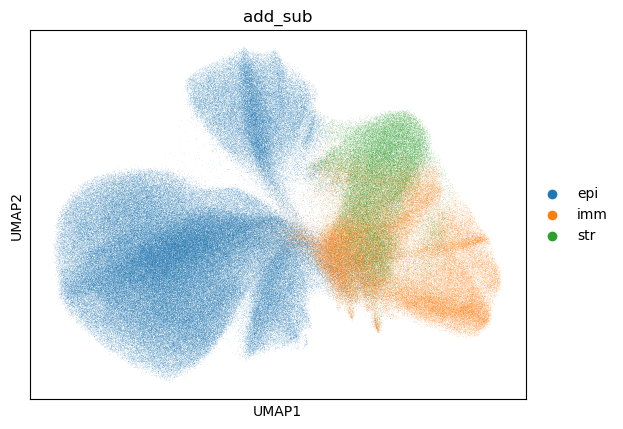

In [35]:
sc.pl.umap(adata, color = 'add_sub')

In [36]:
adata.obs['clust'] = adata.obs['add_sub'].copy()

In [37]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

# Add spatial

In [38]:
adata.obsm["spatial"] = adata.obs[["CenterX_global_px", "CenterY_global_px"]].copy().to_numpy()

In [39]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

In [40]:
import squidpy as sq

/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/home/augusta/anaconda3/envs/scanpy_env/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


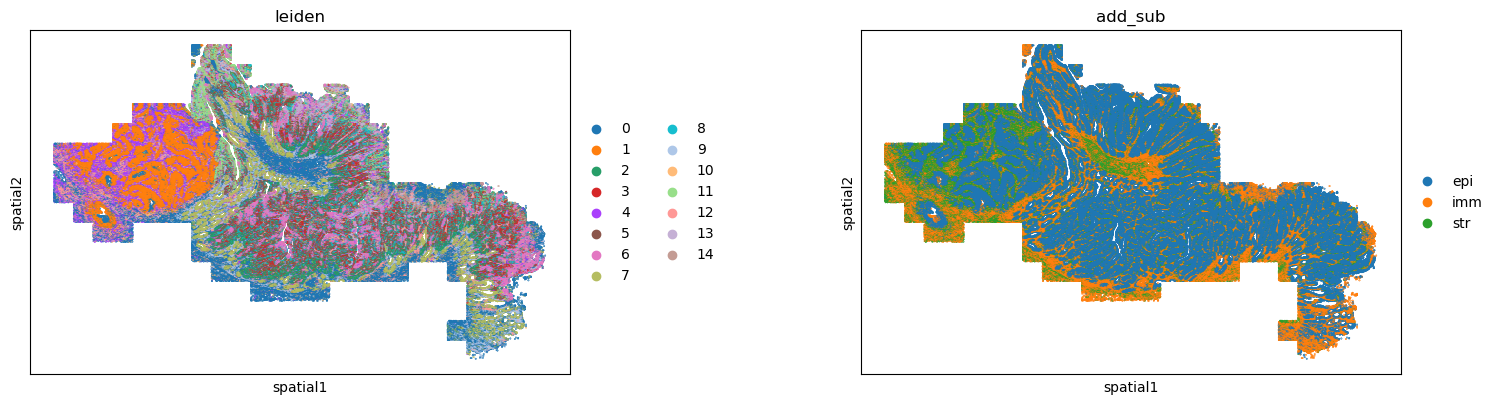

In [41]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden", "add_sub"
    ],
    wspace=0.4,
)

In [42]:
adata

AnnData object with n_obs × n_vars = 451314 × 18545
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_local_px', 'CenterY_local_px', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD68_CK8_18', 'Max.CD68_CK8_18', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'Dash', 'ISH.concentration', 'Panel', 'Run_Tissue_name', 'Run_name', 'assay_type', 'dualfiles', 'tissue', 'version', 'slide_ID', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'unassignedTranscripts', 'median_RNA', 'RNA_quantile_0.75', 'RNA_quantile_0.8', 'RNA_quantile_0.85', 'RNA_quantile_0.9', 'RNA_quantile_0.95', 'RNA_quantile_0.99', 'nCount_RNA', 'nFeature_RNA', 'median_negprobes', 'negprobes_quantile_0.75', 'negprobes_quantile_0.8', 'negprobes_quantile_0.85', 'negprobes_quantile_0.9', 'negprobes_quantile_0.95', 'negprobes_quantile_0.99', 'nCount_negprobes', 'nFeature_negprobes', 'median_falsecode', 'falsecode_quantile_0.75', 'falsecode_quantile_0.8', 'falsecode_quantil

# Add the ROI

In [43]:
import numpy as np

In [44]:
ROI = pd.read_csv(f"/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/{SID}/ROI_{SID}_normal.csv", index_col=0)

In [45]:
healthy_cells = ROI['x']
healthy_cells

1           c_4_63_23
2           c_4_63_26
3           c_4_63_29
4           c_4_63_35
5           c_4_63_39
             ...     
43207    c_4_221_1826
43208    c_4_221_1828
43209    c_4_221_1830
43210    c_4_221_1831
43211    c_4_221_1833
Name: x, Length: 43211, dtype: object

In [46]:
adata.obs['ROI_status'] = 'undefined'

In [47]:
adata.obs.loc[adata.obs_names.isin(healthy_cells), 'ROI_status'] = 'healthy'

In [48]:
adata.obs.ROI_status.unique()

array(['undefined', 'healthy'], dtype=object)

#### Save the processed data

In [49]:
adata.write(f"/home/augusta/SSS_mount/insituCNV/data/WTx-CosMx_TVA/round2/{SID}/adata_{SID}_processed.h5ad", compression='gzip')

... storing 'ROI_status' as categorical
